# Récupérer des données avec des API depuis Python

Lino Galiana  
2024-10-31

<div class="badge-container"><div class="badge-text">Pour essayer les exemples présents dans ce tutoriel :</div><a href="https://github.com/linogaliana/python-datascientist-notebooks/blob/main/notebooks/manipulation/04c_API_TP.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/static/v1?logo=github&label=&message=View%20on%20GitHub&color=181717" alt="View on GitHub"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/vscode-python?autoLaunch=true&name=«04c_API_TP»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-vscode.sh»&init.personalInitArgs=«manipulation%2004c_API_TP%20correction»" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSP%20Cloud-Lancer_avec_VSCode-blue?logo=visualstudiocode&logoColor=blue" alt="Onyxia"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/jupyter-python?autoLaunch=true&name=«04c_API_TP»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-jupyter.sh»&init.personalInitArgs=«manipulation%2004c_API_TP%20correction»" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSP%20Cloud-Lancer_avec_Jupyter-orange?logo=Jupyter&logoColor=orange" alt="Onyxia"></a>
<a href="https://colab.research.google.com/github/linogaliana/python-datascientist-notebooks//blob/main//notebooks/manipulation/04c_API_TP.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a><br></div>

<div class="alert alert-info" role="alert">
<h3 class="alert-heading">Version 🇫🇷</h3>
This is the French version 🇫🇷 of that chapter,to see the English version go <a href="https://pythonds.linogaliana.fr/content/manipulation/04c_API_TP.html">there</a>
</div>

# 1. Introduction : Qu’est-ce qu’une API ?

## 1.1 Définition

Pour expliquer le principe d’une API, nous allons reprendre le début de
la fiche dédiée aux API dans la documentation collaborative sur le logiciel `R` (un logiciel de traitement statistique proche de `Python`)
[utilitR](https://www.book.utilitr.org/api.html) que je recommande de lire :

> Une *Application Programming Interface* (ou API) est une interface de programmation qui permet d’utiliser une application existante pour restituer des données. Le terme d’API peut être paraître intimidant, mais il s’agit simplement d’une façon de mettre à disposition des données : plutôt que de laisser l’utilisateur consulter directement des bases de données (souvent volumineuses et complexes), l’API lui propose de formuler une requête qui est traitée par le serveur hébergeant la base de données, puis de recevoir des données en réponse à sa requête.
>
> D’un point de vue informatique, une API est une porte d’entrée clairement identifiée par laquelle un logiciel offre des services à d’autres logiciels (ou utilisateurs). L’objectif d’une API est de fournir un point d’accès à une fonctionnalité qui soit facile à utiliser et qui masque les détails de la mise en oeuvre. Par exemple, l’API Sirene permet de récupérer la raison sociale d’une entreprise à partir de son identifiant Siren en interrogeant le référentiel disponible sur Internet directement depuis un script R, sans avoir à connaître tous les détails du répertoire Sirene.
>
> À l’Insee comme ailleurs, la connexion entre les bases de données pour les nouveaux projets tend à se réaliser par des API. L’accès à des données par des API devient ainsi de plus en plus commun et est amené à devenir une compétence de base de tout utilisateur de données.
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

## 1.2 Avantages des API

A nouveau, citons la documentation [utilitR](https://www.book.utilitr.org/api.html) :

Les API présentent de multiples avantages :

> -   Les API rendent les programmes plus reproductibles. En effet, grâce aux API, il est possible de mettre à jour facilement les données utilisées par un programme si celles-ci évoluent. Cette flexibilité accrue pour l’utilisateur évite au producteur de données d’avoir à réaliser de multiples extractions, et réduit le problème de la coexistence de versions différentes des données.
> -   Grâce aux API, l’utilisateur peut extraire facilement une petite partie d’une base de données plus conséquente.
> -   Les API permettent de mettre à disposition des données tout en limitant le nombre de personnes ayant accès aux bases de données elles-mêmes.
> -   Grâce aux API, il est possible de proposer des services sur mesure pour les utilisateurs (par exemple, un accès spécifique pour les gros utilisateurs).
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

L’utilisation accrue d’API dans le cadre de stratégies open-data est l’un
des piliers des 15 feuilles de route ministérielles
en matière d’ouverture, de circulation et de valorisation des données publiques.

## 1.3 Utilisation des API

Citons encore une fois
la documentation [`utilitR`](https://www.book.utilitr.org/api.html) :

> Une API peut souvent être utilisée de deux façons : par une interface Web, et par l’intermédiaire d’un logiciel (R, Python…). Par ailleurs, les API peuvent être proposées avec un niveau de liberté variable pour l’utilisateur :
>
> -   soit en libre accès (l’utilisation n’est pas contrôlée et l’utilisateur peut utiliser le service comme bon lui semble) ;
> -   soit via la génération d’un compte et d’un jeton d’accès qui permettent de sécuriser l’utilisation de l’API et de limiter le nombre de requêtes.
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

De nombreuses API nécessitent une authentification, c’est-à-dire un
compte utilisateur afin de pouvoir accéder aux données.
Dans un premier temps,
nous regarderons exclusivement les API ouvertes sans restriction d’accès.  
Certains exercices et exemples permettront néanmoins d’essayer des API
avec restrictions d’accès.

# 2. Requêter une API

## 2.1 Principe général

> L’utilisation de l’interface Web est utile dans une démarche exploratoire mais trouve rapidement ses limites, notamment lorsqu’on consulte régulièrement l’API. L’utilisateur va rapidement se rendre compte qu’il est beaucoup plus commode d’utiliser une API via un logiciel de traitement pour automatiser la consultation ou pour réaliser du téléchargement de masse. De plus, l’interface Web n’existe pas systématiquement pour toutes les API.
>
> Le mode principal de consultation d’une API consiste à adresser une requête à cette API via un logiciel adapté (R, Python, Java…). Comme pour l’utilisation d’une fonction, l’appel d’une API comprend des paramètres qui sont détaillées dans la documentation de l’API.
>
> [`utilitR`](https://www.book.utilitr.org/api.html)

Voici les éléments importants à avoir en tête sur les requêtes (j’emprunte encore
à [`utilitR`](https://www.book.utilitr.org/api.html)) :

-   Le **point d’entrée** d’un service offert par une API se présente sous la forme d’une URL (adresse web).
    Chaque service proposé par une API a sa propre URL. Par exemple, dans le cas de l’OpenFood Facts,
    l’URL à utiliser pour obtenir des informations sur un produit particulier (l’identifiant `737628064502`)
    est <https://world.openfoodfacts.org/api/v0/product/737628064502.json>
-   Cette URL doit être complétée avec différents paramètres qui précisent la requête (par exemple l’identifiant Siren). Ces paramètres viennent s’ajouter à l’URL, souvent à la suite de `?`. Chaque service proposé par une API a ses propres paramètres, détaillés dans la documentation.
-   Lorsque l’utilisateur soumet sa requête, l’API lui renvoie une réponse structurée contenant l’ensemble des informations demandées. Le résultat envoyé par une API est majoritairement aux formats `JSON` ou `XML` (deux formats dans lesquels les informations sont hiérarchisées de manière emboitée). Plus rarement, certains services proposent une information sous forme plate (de type csv).

Du fait de la dimension hiérarchique des formats `JSON` ou `XML`,
le résultat n’est pas toujours facile à récupérer mais
`Python` propose d’excellents outils pour cela (meilleurs que ceux de `R`).
Certains packages, notamment `json`, facilitent l’extraction de champs d’une sortie d’API.
Dans certains cas, des *packages* spécifiques à une API ont été créés pour simplifier l’écriture d’une requête ou la récupération du résultat. Par exemple, le package
[`pynsee`](https://github.com/InseeFrLab/Py-Insee-Data/tree/main/pynsee)
propose des options qui seront retranscrites automatiquement dans l’URL de
requête pour faciliter le travail sur les données Insee.

## 2.2 Illustration avec une API de l’Ademe pour obtenir des diagnostics énergétiques

Le diagnostic de performance énergétique (DPE)
renseigne sur la performance énergétique d’un logement ou d’un bâtiment,
en évaluant sa consommation d’énergie et son impact en termes d’émissions de gaz à effet de serre.

Les données des performances énergétiques des bâtiments sont
mises à disposition par l’[Ademe](https://data.ademe.fr/datasets/dpe-france).
Comme ces données sont relativement
volumineuses, une API peut être utile lorsqu’on ne s’intéresse
qu’à un sous-champ des données.
Une documentation et un espace de test de l’API sont disponibles
sur le site [API GOUV](https://api.gouv.fr/documentation/api_dpe_logements)[1].

Supposons qu’on désire récupérer une centaine de valeurs pour la commune
de Villieu-Loyes-Mollon dans l’Ain (code Insee 01450).

L’API comporte plusieurs points d’entrée. Globalement, la racine
commune est :

> https://koumoul.com/data-fair/api/v1/datasets/dpe-france

Ensuite, en fonction de l’API désirée, on va ajouter des éléments
à cette racine. En l’occurrence, on va utiliser
l’API `field` qui permet de récupérer des lignes en fonction d’un
ou plusieurs critères (pour nous, la localisation géographique):

L’exemple donné dans la documentation technique est

> GET https://koumoul.com/data-fair/api/v1/datasets/dpe-france/values/{field}

ce qui en `Python` se traduira par l’utilisation de la méthode `get` du
package `Request`
sur un url dont la structure est la suivante :

-   il commencera par `https://koumoul.com/data-fair/api/v1/datasets/dpe-france/values/` ;
-   il sera ensuite suivi par des paramètres de recherche. Le champ `{field}`
    commence ainsi généralement par un `?` qui permet ensuite de spécifier des paramètres
    sous la forme `nom_parameter=value`

A la lecture de la documentation, les premiers paramètres qu’on désire :

-   Le nombre de pages, ce qui nous permet d’obtenir un certain nombre d’échos. On
    va seulement récupérer 10 pages ce qui correspond à une centaine d’échos. On va
    néanmoins préciser qu’on veut 100 échos
-   Le format de sortie. On va privilégier le `JSON` qui est un format standard dans le
    monde des API. `Python` offre beaucoup de flexibilité grâce à l’un de
    ses objets de base, à savoir le dictionnaire (type `dict`), pour manipuler de tels
    fichiers
-   Le code commune des données qu’on désire obtenir. Comme on l’a évoqué,
    on va récupérer les données dont le code commune est `01450`. D’après la doc,
    il convient de passer le code commune sous le format:
    `code_insee_commune_actualise:{code_commune}`. Pour éviter tout risque de
    mauvais formatage, on va utiliser `%3A` pour signifier `:`, `%2A` pour signifier `*` et
    `%22` pour signifier `"`.
-   D’autres paramètres annexes, suggérés par la documentation

Cela nous donne ainsi un URL dont la structure est la suivante :

[1] La documentation est également disponible [ici](https://koumoul.com/openapi-viewer/?proxy=false&hide-toolbar=true&url=https://koumoul.com/s/data-fair/api/v1/datasets/dpe-france/api-docs.json)

In [1]:
city_code = "01450"
size = 100
api_root = "https://koumoul.com/data-fair/api/v1/datasets/dpe-france/lines"
url_api = (
    f"{api_root}?format=json&q_mode=simple&qs=code_insee_commune_actualise"
    + "%3A%22"
    + f"{city_code}"
    + "%22"
    + f"&size={size}&select="
    + "%2A&sampling=neighbors"
)


Si vous introduisez cet URL dans votre navigateur, vous devriez aboutir
sur un `JSON` non formaté[1]. En `Python`,
on peut utiliser `requests` pour récupérer les données[2] :

[1] JSON is a highly appreciated format in the field of *big data* because it allows stacking incomplete data. It is one of the preferred formats of the No-SQL paradigm, for which this [excellent course](http://b3d.bdpedia.fr/) offers a gentle introduction.

[2] Depending on the API, we either need nothing more if we directly obtain a JSON, or we may need to use a parser like `BeautifulSoup` otherwise. Here, the JSON can be formatted relatively easily.

In [2]:
import requests
import pandas as pd

req = requests.get(url_api)
wb = req.json()


Prenons par exemple les 1000 premiers caractères du résultat, pour se donner
une idée du résultat et se convaincre que notre filtre au niveau
communal est bien passé :

``` python
print(req.content[:1000])
```

b’{“total”: 121,“next”: “https://koumoul.com/data-fair/api/v1/datasets/dpe-france/lines?format=json&q_mode=simple&qs=code_insee_commune_actualise%3A%2201450%22&size=100&select=\*&sampling=neighbors&after=102719%2C912454”,“results”: \[\n {“classe_consommation_energie”: “E”,“tr001_modele_dpe_type_libelle”: “Vente”,“annee_construction”: 1,“\_geopoint”: “45.927488,5.230195”,“latitude”: 45.927488,“surface_thermique_lot”: 106.87,“\_i”: 2,“tr002_type_batiment_description”: “Maison Individuelle”,“geo_adresse”: “Rue du Chateau 01800 Villieu-Loyes-Mollon”,“\_rand”: 959550,“code_insee_commune_actualise”: “01450”,“estimation_ges”: 9,“geo_score”: 0.58,“classe_estimation_ges”: “B”,“nom_methode_dpe”: “M9thode Facture”,“tv016_departement_code”: “01”,“consommation_energie”: 286,“date_etablissement_dpe”: “2013-04-15”,“longitude”: 5.230195,“\_score”: null,’

Ici, il n’est même pas nécessaire en première approche
d’utiliser le package `json`, l’information
étant déjà tabulée dans l’écho renvoyé (on a la même information pour tous les pays):
On peut donc se contenter de `Pandas` pour transformer nos données en
`DataFrame` et `Geopandas` pour convertir en données
géographiques :

In [4]:
import pandas as pd
import geopandas as gpd


def get_dpe_from_url(url):

    req = requests.get(url)
    wb = req.json()
    df = pd.json_normalize(wb["results"])

    dpe = gpd.GeoDataFrame(
        df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs=4326
    )
    dpe = dpe.dropna(subset=["longitude", "latitude"])

    return dpe


dpe = get_dpe_from_url(url_api)
dpe.head(2)


2 rows × 23 columns

Essayons de représenter sur une carte ces DPE avec les années de construction des logements. Avec `Folium`, on obtient la carte interactive suivante :

In [5]:
import seaborn as sns
import folium

palette = sns.color_palette("coolwarm", 8)


def interactive_map_dpe(dpe):

    # convert to number
    dpe["color"] = [
        ord(dpe.iloc[i]["classe_consommation_energie"].lower()) - 96
        for i in range(len(dpe))
    ]
    dpe = dpe.loc[dpe["color"] <= 7]
    dpe["color"] = [palette.as_hex()[x] for x in dpe["color"]]

    center = dpe[["latitude", "longitude"]].mean().values.tolist()
    sw = dpe[["latitude", "longitude"]].min().values.tolist()
    ne = dpe[["latitude", "longitude"]].max().values.tolist()

    m = folium.Map(location=center, tiles="OpenStreetMap")

    # I can add markers one by one on the map
    for i in range(0, len(dpe)):
        folium.Marker(
            [dpe.iloc[i]["latitude"], dpe.iloc[i]["longitude"]],
            popup=f"Year of construction: {dpe.iloc[i]['annee_construction']}, <br>DPE: {dpe.iloc[i]['classe_consommation_energie']}",
            icon=folium.Icon(
                color="black", icon="home", icon_color=dpe.iloc[i]["color"]
            ),
        ).add_to(m)

    m.fit_bounds([sw, ne])

    return m


m = interactive_map_dpe(dpe)


/opt/conda/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
# Display the map
m


Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-3.7.1.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap-glyphicons.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_9462986b358a40904be91bc84a6240cd {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
</head>
<body>
 
 
 <div class="folium-map" id="map_9462986b358a40904be91bc84a6240cd" ></div>
 
</body>
<script>
 
 
 var map_9462986b358a40904be91bc84a6240cd = L.map(
 "map_9462986b358a40904be91bc84a6240cd",
 {
 center: [45.922392181818175, 5.225450250000001],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_eaa4ba2e3c11f69fdbfb9de1c08faaad = L.tileLayer(
 "https://tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "\u0026copy; \u003ca href=\"https://www.openstreetmap.org/copyright\"\u003eOpenStreetMap\u003c/a\u003e contributors", "detectRetina": false, "maxNativeZoom": 19, "maxZoom": 19, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 );
 
 
 tile_layer_eaa4ba2e3c11f69fdbfb9de1c08faaad.addTo(map_9462986b358a40904be91bc84a6240cd);
 
 
 var marker_a34c7bd1eba68f7954340c6cafdcf443 = L.marker(
 [45.927488, 5.230195],
 {}
 ).addTo(map_9462986b358a40904be91bc84a6240cd);
 
 
 var icon_030ded3c31e36b4c48cf0614f00c3efc = L.AwesomeMarkers.icon(
 {"extraClasses": "fa-rotate-0", "icon": "home", "iconColor": "#f7b89c", "markerColor": "black", "prefix": "glyphicon"}
 );
 marker_a34c7bd1eba68f7954340c6cafdcf443.setIcon(icon_030ded3c31e36b4c48cf0614f00c3efc);
 
 
 var popup_e2c9ecaa61fef0aeeb6bf3d7f1f3abd5 = L.popup({"maxWidth": "100%"});

 
 
 var html_2a125df309f6fcba16323b0926dfaf04 = $(`<div id="html_2a125df309f6fcba16323b0926dfaf04" style="width: 100.0%; height: 100.0%;">Year of construction: 1, <br>DPE: E</div>`)[0];
 popup_e2c9ecaa61fef0aeeb6bf3d7f1f3abd5.setContent(html_2a125df309f6fcba16323b0926dfaf04);
 
 

 marker_a34c7bd1eba68f7954340c6cafdcf443.bindPopup(popup_e2c9ecaa61fef0aeeb6bf3d7f1f3abd5)
 ;

 
 
 
 var marker_ba0761d4b428afded6731fb8d7169631 = L.marker(
 [45.931376, 5.230461],
 {}
 ).addTo(map_9462986b358a40904be91bc84a6240cd);
 
 
 var icon_f6d4edd09c1dd0e5711b6ef3b575dd4a = L.AwesomeMarkers.icon(
 {"extraClasses": "fa-rotate-0", "icon": "home", "iconColor": "#d95847", "markerColor": "black", "prefix": "glyphicon"}
 );
 marker_ba0761d4b428afded6731fb8d7169631.setIcon(icon_f6d4edd09c1dd0e5711b6ef3b575dd4a);
 
 
 var popup_0ab5ad2252efadea96cec0343df55d65 = L.popup({"maxWidth": "100%"});

 
 
 var h

## 2.3 Un catalogue incomplet d’API existantes

De plus en plus de sites mettent des API à disposition des développeurs et autres curieux.

Pour en citer quelques-unes très connues :

-   `Twitter` <i class="fab fa-twitter"></i> : <https://dev.twitter.com/rest/public>
-   `Facebook` <i class="fab fa-facebook"></i> : <https://developers.facebook.com/>
-   `Instagram` <i class="fab fa-instagram"></i> : <https://www.instagram.com/developer/>
-   `Spotify` <i class="fab fa-spotify"></i> : <https://developer.spotify.com/web-api/>

Cependant, il est intéressant de ne pas se restreindre à celles-ci dont les
données ne sont pas toujours les plus intéressantes. Beaucoup
de producteurs de données, privés comme publics, mettent à disposition
leurs données sous forme d’API.

-   [API gouv](https://api.gouv.fr/) : beaucoup d’API officielles de l’Etat français
    et accès à de la documentation
-   Insee : https://api.insee.fr/catalogue/ et [`pynsee`](https://github.com/InseeFrLab/Py-Insee-Data/tree/main/pynsee)
-   Pôle Emploi : https://www.emploi-store-dev.fr/portail-developpeur-cms/home.html
-   SNCF : https://data.sncf.com/api
-   Banque Mondiale : https://datahelpdesk.worldbank.org/knowledgebase/topics/125589

# 3. L’API DVF : accéder à des données de transactions immobilières simplement

<div class="alert alert-danger" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-triangle-exclamation"></i> Important</h3>

Cette partie nécessite une mise à jour pour privilégier l’API DVF du Cerema

</div>

Le site `DVF` (demandes de valeurs foncières) permet de visualiser toutes les données relatives aux mutations à titre onéreux (ventes de maisons, appartements, garages…) réalisées durant les 5 dernières années.

Un site de visualisation est disponible sur <https://app.dvf.etalab.gouv.fr/>.

Ce site est très complet quand il s’agit de connaître le prix moyen au mètre
carré d’un quartier ou de comparer des régions entre elles.
L’API DVF permet d’aller plus loin afin de récupérer les résultats dans
un logiciel de traitement de données. Elle a été réalisée par
[Christian Quest](https://github.com/cquest) et le code
source est disponible sur Github <a href="https://github.com/cquest/dvf_as_api" class="github"><i class="fab fa-github"></i></a>.

Les critères de recherche sont les suivants :
- `code_commune` = code INSEE de la commune (ex: 94068)
- `section` = section cadastrale (ex: 94068000CQ)
- `numero_plan` = identifiant de la parcelle, (ex: 94068000CQ0110)
- `lat` + `lon` + `dist` (optionnel): pour une recherche géographique, dist est par défaut un rayon de 500m
- `code_postal`

Les filtres de sélection complémentaires :
- `nature_mutation` (Vente, etc)
- `type_local` (Maison, Appartement, Local, Dépendance)

Les requêtes sont de la forme : `http://api.cquest.org/dvf?code_commune=29168`.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 1 : Exploiter l’API DVF</h3>

1.  Rechercher toutes les transactions existantes dans DVF à Plogoff (code commune `29168`, en Bretagne).
    Afficher les clés du JSON et en déduire le nombre de transactions répertoriées.
2.  N’afficher que les transactions portant sur des maisons.
3.  Utiliser l’[API geo](https://api.gouv.fr/documentation/api-geo) pour
    récupérer le découpage communal de la ville de Plogoff.
4.  Représenter l’histogramme des prix de vente.

N’hésitez pas à aller plus loin en jouant sur des variables de
groupes par exemple.

</div>

Le résultat de la question 2 devrait ressembler au `DataFrame` suivant :

L’histogramme des prix de vente (question 4) aura l’aspect suivant :

On va faire une carte des ventes en affichant le prix de l’achat.
La cartographie réactive sera présentée dans les chapitres
consacrés à la visualisation de données.

Supposons que le DataFrame des ventes s’appelle `ventes`. Il faut d’abord le
convertir
en objet `geopandas`.

431 rows × 49 columns

Avant de faire une carte, on va convertir
les limites de la commune de Plogoff en geoJSON pour faciliter
sa représentation avec `folium`
([voir la doc `Geopandas` à ce propos](https://geopandas.readthedocs.io/en/latest/gallery/polygon_plotting_with_folium.html#Add-polygons-to-map)):

Pour représenter graphiquement, on peut utiliser le code suivant (essayez de
le comprendre et pas uniquement de l’exécuter).

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-3.7.1.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap-glyphicons.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_98f70d2c6110c23a853ffabd04a50e7c {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
</head>
<body>
 
 
 <div class="folium-map" id="map_98f70d2c6110c23a853ffabd04a50e7c" ></div>
 
</body>
<script>
 
 
 var map_98f70d2c6110c23a853ffabd04a50e7c = L.map(
 "map_98f70d2c6110c23a853ffabd04a50e7c",
 {
 center: [48.03477472157772, -4.671743032482598],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_229a5019671aa3e5bf699bfdbd21ad0e = L.tileLayer(
 "https://tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "\u0026copy; \u003ca href=\"https://www.openstreetmap.org/copyright\"\u003eOpenStreetMap\u003c/a\u003e contributors", "detectRetina": false, "maxNativeZoom": 19, "maxZoom": 19, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 );
 
 
 tile_layer_229a5019671aa3e5bf699bfdbd21ad0e.addTo(map_98f70d2c6110c23a853ffabd04a50e7c);
 
 
 var marker_6e3e944e5fa3c278d84e8a969871fb45 = L.marker(
 [48.03781, -4.717967],
 {}
 ).addTo(map_98f70d2c6110c23a853ffabd04a50e7c);
 
 
 var icon_27491d24a4ae753003f447f46cc2cd0f = L.AwesomeMarkers.icon(
 {"extraClasses": "fa-rotate-0", "icon": "", "iconColor": "white", "markerColor": "red", "prefix": "glyphicon"}
 );
 marker_6e3e944e5fa3c278d84e8a969871fb45.setIcon(icon_27491d24a4ae753003f447f46cc2cd0f);
 
 
 var popup_4e36d009f183ea5119720285b629e736 = L.popup({"maxWidth": "100%"});

 
 
 var html_165b269d45e5a538a2facb3a52daa89b = $(`<div id="html_165b269d45e5a538a2facb3a52daa89b" style="width: 100.0%; height: 100.0%;">Adresse: 5215 LA POINTE DU RAZ <br>Vente en 2017 <br>Prix 176000 €</div>`)[0];
 popup_4e36d009f183ea5119720285b629e736.setContent(html_165b269d45e5a538a2facb3a52daa89b);
 
 

 marker_6e3e944e5fa3c278d84e8a969871fb45.bindPopup(popup_4e36d009f183ea5119720285b629e736)
 ;

 
 
 
 var marker_f68a725431a0e3f62e9ded810298fd18 = L.marker(
 [48.03781, -4.717967],
 {}
 ).addTo(map_98f70d2c6110c23a853ffabd04a50e7c);
 
 
 var icon_2f7d2a3dcf2d86c38967a0c28d03782a = L.AwesomeMarkers.icon(
 {"extraClasses": "fa-rotate-0", "icon": "", "iconColor": "white", "markerColor": "lightblue", "prefix": "glyphicon"}
 );
 marker_f68a725431a0e3f62e9ded810298fd18.setIcon(icon_2f7d2a3dcf2d86c38967a0c28d03782a);
 
 
 var popup_f7d69362c161cf3e613dc0376026569a = L.popup({"maxWidth": 

# 4. Géocoder des données grâce aux API officielles

Pour pouvoir faire cet exercice

In [14]:
!pip install xlrd

Jusqu’à présent, nous avons travaillé sur des données où la dimension
géographique était déjà présente ou relativement facile à intégrer.

Ce cas idéal ne se rencontre pas nécessairement dans la pratique.
On dispose parfois de localisations plus ou moins précises et plus ou
moins bien formattées pour déterminer la localisation de certains
lieux.

Depuis quelques années, un service officiel de géocodage a été mis en place.
Celui-ci est gratuit et permet de manière efficace de coder des adresses
à partir d’une API. Cette API, connue sous le
nom de la **Base d’Adresses Nationale (BAN)** a bénéficié de la mise en commun de données de plusieurs
acteurs (collectivités locales, Poste) et de compétences d’acteurs
comme Etalab. La documentation de celle-ci est disponible à l’adresse
<https://api.gouv.fr/les-api/base-adresse-nationale>.

Pour illustrer la manière de géocoder des données avec `Python`, nous
allons partir de la base
[des résultats des auto-écoles à l’examen du permis sur l’année 2018](https://www.data.gouv.fr/fr/datasets/taux-de-reussite-auto-ecole-par-auto-ecole-en-2018/).

Ces données nécessitent un petit peu de travail pour être propres à une
analyse statistique.
Après avoir renommé les colonnes, nous n’allons conserver que
les informations relatives au permis B (permis voiture classique) et
les auto-écoles ayant présenté au moins 20 personnes à l’examen.

In [15]:
import pandas as pd
import xlrd
import geopandas as gpd

df = pd.read_excel(
    "https://www.data.gouv.fr/fr/datasets/r/d4b6b072-8a7d-4e04-a029-8cdbdbaf36a5",
    header=[0, 1],
)

# The Excel file has nested column names,
# we clean it
index_0 = [
    "" if df.columns[i][0].startswith("Unnamed") else df.columns[i][0]
    for i in range(len(df.columns))
]
index_1 = [df.columns[i][1] for i in range(len(df.columns))]
keep_index = [True if el in ("", "B") else False for el in index_0]
cols = [index_0[i] + " " + index_1[i].replace("+", "_") for i in range(len(df.columns))]
df.columns = cols
df = df.loc[:, keep_index]
df.columns = df.columns.str.replace("(^ |°)", "", regex=True).str.replace(" ", "_")

# We keep the subsample of interest
df = df.dropna(subset=["B_NB"])
df = df.loc[~df["B_NB"].astype(str).str.contains(r"(\%|\.)", regex=True), :]
df["B_NB"] = df["B_NB"].astype(int)
df["B_TR"] = (
    df["B_TR"].str.replace(",", ".").str.replace("%", "", regex=True).astype(float)
)
df = df.loc[df["B_NB"] > 20]


/tmp/ipykernel_631/453192817.py:19: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.


In this sample, the average success rate in 2018 was 58.02%

Nos informations géographiques prennent la forme suivante :

In [17]:
df.loc[:, ["Adresse", "CP", "Ville"]].head(5)


Autrement dit, nous disposons d’une adresse, d’un code postal et d’un nom de ville. Ces informations peuvent servir à faire une recherche sur la localisation d’une auto-école puis, éventuellement, de se restreindre à un sous-échantillon.

## 4.1 Utiliser l’API BAN

La [documentation officielle de l’API](https://adresse.data.gouv.fr/api-doc/adresse) propose un certain nombre d’exemples de manière de géolocaliser des données. Dans notre situation, deux points d’entrée paraissent intéressants:

-   **L’API `/search/`** qui représente un point d’entrée avec des URL de la forme `https://api-adresse.data.gouv.fr/search/?q=\<adresse\>&postcode=\<codepostal\>&limit=1`
-   **L’API `/search/csv`** qui prend un CSV en entrée et retourne ce même CSV avec les observations géocodées. La requête prend la forme suivante, en apparence moins simple à mettre en oeuvre : `curl -X POST -F data=@search.csv -F columns=adresse -F columns=postcode https://api-adresse.data.gouv.fr/search/csv/`

La tentation serait forte d’utiliser la première méthode avec une boucle sur les lignes de notre `DataFrame` pour géocoder l’ensemble de notre jeu de données. Cela serait néanmoins une mauvaise idée car les communications entre notre session `Python` et les serveurs de l’API seraient beaucoup trop nombreuses pour offrir des performances satisfaisantes.

Pour vous en convaincre, vous pouvez exécuter le code suivant sur un petit échantillon de données (par exemple 100 comme ici) et remarquer que le temps d’exécution est assez important

In [18]:
import time

dfgeoloc = df.loc[:, ["Adresse", "CP", "Ville"]].apply(
    lambda s: s.str.lower().str.replace(",", " ")
)
dfgeoloc["url"] = (
    dfgeoloc["Adresse"] + "+" + dfgeoloc["Ville"].str.replace("-", "+")
).str.replace(" ", "+")
dfgeoloc["url"] = (
    "https://api-adresse.data.gouv.fr/search/?q="
    + dfgeoloc["url"]
    + "&postcode="
    + df["CP"]
    + "&limit=1"
)
dfgeoloc = dfgeoloc.dropna()

start_time = time.time()


def get_geoloc(i):
    print(i)
    return gpd.GeoDataFrame.from_features(
        requests.get(dfgeoloc["url"].iloc[i]).json()["features"]
    )


local = [get_geoloc(i) for i in range(len(dfgeoloc.head(10)))]
print("--- %s seconds ---" % (time.time() - start_time))


Comme l’indique la documentation, si on désire industrialiser notre processus de géocodage, on va privilégier l’API CSV.

Pour obtenir une requête `CURL` cohérente avec le format désiré par l’API on va à nouveau utiliser `Requests` mais cette fois avec des paramètres supplémentaires:

-   `data` va nous permettre de passer des paramètres à `CURL` (équivalents aux `-F` de la requête `CURL`) :
    -   `columns`: Les colonnes utilisées pour localiser une donnée. En l’occurrence, on utilise l’adresse et la ville (car les codes postaux n’étant pas uniques, un même nom de voirie peut se trouver dans plusieurs villes partageant le même code postal) ;
    -   `postcode`: Le code postal de la ville. Idéalement nous aurions utilisé le code Insee mais nous ne l’avons pas dans nos données ;
    -   `result_columns`: on restreint les données échangées avec l’API aux colonnes qui nous intéressent. Cela permet d’accélérer les processus (on échange moins de données) et de réduire l’impact carbone de notre activité (moins de transferts = moins d’énergie dépensée). En l’occurrence, on ne ressort que les données géolocalisées et un score de confiance en la géolocalisation ;
-   `files`: permet d’envoyer un fichier via `CURL`.

Les données sont récupérées avec `request.post`. Comme il s’agit d’une chaîne de caractère, nous pouvons directement la lire avec `Pandas` en utilisant `io.StringIO` pour éviter d’écrire des données intermédiaires.

Le nombre d’échos semblant être limité, il est proposé de procéder par morceaux (ici, le jeu de données est découpé en 5 morceaux).

In [19]:
import requests
import io
import numpy as np
import time

params = {
    "columns": ["Adresse", "Ville"],
    "postcode": "CP",
    "result_columns": ["result_score", "latitude", "longitude"],
}

df[["Adresse", "CP", "Ville"]] = df.loc[:, ["Adresse", "CP", "Ville"]].apply(
    lambda s: s.str.lower().str.replace(",", " ")
)


def geoloc_chunk(x):
    dfgeoloc = x.loc[:, ["Adresse", "CP", "Ville"]]
    dfgeoloc.to_csv("datageocodage.csv", index=False)
    response = requests.post(
        "https://api-adresse.data.gouv.fr/search/csv/",
        data=params,
        files={"data": ("datageocodage.csv", open("datageocodage.csv", "rb"))},
    )
    geoloc = pd.read_csv(io.StringIO(response.text), dtype={"CP": "str"})
    return geoloc


start_time = time.time()
geodata = [geoloc_chunk(dd) for dd in np.array_split(df, 10)]
print("--- %s seconds ---" % (time.time() - start_time))


Cette méthode est beaucoup plus rapide et permet ainsi, une fois retourné à nos données initiales, d’avoir un jeu de données géolocalisé.

In [20]:
# Retour aux données initiales
geodata = pd.concat(geodata, ignore_index=True)
df_xy = df.merge(geodata, on=["Adresse", "CP", "Ville"])
df_xy = df_xy.dropna(subset=["latitude", "longitude"])

# Mise en forme pour le tooltip
df_xy["text"] = (
    df_xy["Raison_Sociale"]
    + "<br>"
    + df_xy["Adresse"]
    + "<br>"
    + df_xy["Ville"]
    + "<br>Nombre de candidats:"
    + df_xy["B_NB"].astype(str)
)
df_xy.filter(
    ["Raison_Sociale", "Adresse", "CP", "Ville", "latitude", "longitude"],
    axis="columns",
).sample(10)


Il ne reste plus qu’à utiliser `Geopandas` et nous serons en mesure de faire une carte des localisations des auto-écoles :

In [21]:
# Transforme en geopandas pour les cartes
import geopandas as gpd

dfgeo = gpd.GeoDataFrame(
    df_xy, geometry=gpd.points_from_xy(df_xy.longitude, df_xy.latitude)
)


Nous allons représenter les stations dans l’Essonne avec un zoom initialement sur les villes de Massy et Palaiseau. Le code est le suivant :

In [22]:
import folium

# Représenter toutes les autoécoles de l'Essonne
df_91 = df_xy.loc[df_xy["Dept"] == "091"]

# Centrer la vue initiale sur Massy-Palaiseau
df_pal = df_xy.loc[df_xy["Ville"].isin(["massy", "palaiseau"])]
center = df_pal[["latitude", "longitude"]].mean().values.tolist()
sw = df_pal[["latitude", "longitude"]].min().values.tolist()
ne = df_pal[["latitude", "longitude"]].max().values.tolist()

m = folium.Map(location=center, tiles="OpenStreetMap")

# I can add marker one by one on the map
for i in range(0, len(df_91)):
    folium.Marker(
        [df_91.iloc[i]["latitude"], df_91.iloc[i]["longitude"]],
        popup=df_91.iloc[i]["text"],
        icon=folium.Icon(icon="car", prefix="fa"),
    ).add_to(m)

m.fit_bounds([sw, ne])


In [23]:
# Afficher la carte
m


Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-3.7.1.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap-glyphicons.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_8c31647fcad255904afb3d6adc8f5b78 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
</head>
<body>
 
 
 <div class="folium-map" id="map_8c31647fcad255904afb3d6adc8f5b78" ></div>
 
</body>
<script>
 
 
 var map_8c31647fcad255904afb3d6adc8f5b78 = L.map(
 "map_8c31647fcad255904afb3d6adc8f5b78",
 {
 center: [48.719999384615384, 2.2558326153846155],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_f391017a11c28cfcfce49e379bc1292f = L.tileLayer(
 "https://tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "\u0026copy; \u003ca href=\"https://www.openstreetmap.org/copyright\"\u003eOpenStreetMap\u003c/a\u003e contributors", "detectRetina": false, "maxNativeZoom": 19, "maxZoom": 19, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 );
 
 
 tile_layer_f391017a11c28cfcfce49e379bc1292f.addTo(map_8c31647fcad255904afb3d6adc8f5b78);
 
 
 var marker_29293ee08767e3c538abcaab5f5d89ff = L.marker(
 [48.588271, 2.451024],
 {}
 ).addTo(map_8c31647fcad255904afb3d6adc8f5b78);
 
 
 var icon_22da75629546107ea31b81ae8ee991dc = L.AwesomeMarkers.icon(
 {"extraClasses": "fa-rotate-0", "icon": "car", "iconColor": "white", "markerColor": "blue", "prefix": "fa"}
 );
 marker_29293ee08767e3c538abcaab5f5d89ff.setIcon(icon_22da75629546107ea31b81ae8ee991dc);
 
 
 var popup_96c53b6df8a0fde25ce20661c465cbef = L.popup({"maxWidth": "100%"});

 
 
 var html_fba1bcab76b710035d471bb1562fcc04 = $(`<div id="html_fba1bcab76b710035d471bb1562fcc04" style="width: 100.0%; height: 100.0%;">GENERALISTE<br>route de lisses<br>villabe<br>Nombre de candidats:46</div>`)[0];
 popup_96c53b6df8a0fde25ce20661c465cbef.setContent(html_fba1bcab76b710035d471bb1562fcc04);
 
 

 marker_29293ee08767e3c538abcaab5f5d89ff.bindPopup(popup_96c53b6df8a0fde25ce20661c465cbef)
 ;

 
 
 
 var marker_537c8557876403eb439fdcb38b9d3f3e = L.marker(
 [48.697171, 2.522375],
 {}
 ).addTo(map_8c31647fcad255904afb3d6adc8f5b78);
 
 
 var icon_d705026085323ff4b697d4a219a702a0 = L.AwesomeMarkers.icon(
 {"extraClasses": "fa-rotate-0", "icon": "car", "iconColor": "white", "markerColor": "blue", "prefix": "fa"}
 );
 marker_537c8557876403eb439fdcb38b9d3f3e.setIcon(icon_d705026085323ff4b697d4a219a702a0);
 
 
 var popup_bf71daab983a76a2ccb862e7ce59ef1e = L.popup({"maxWidth": "100%"});


Vous pouvez aller plus loin avec l’exercice suivant.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 2 : Quelles sont les auto-écoles les plus proches de chez moi ?</h3>

On va supposer que vous cherchez, dans un rayon donné autour d’un centre ville,
les auto-écoles disponibles.

<details>

<summary>

Fonction nécessaire pour cet exercice

</summary>

Cet exercice nécessite une fonction pour créer un cercle
autour d’un point
(source [ici](https://gis.stackexchange.com/questions/289044/creating-buffer-circle-x-kilometers-from-point-using-python/289923)).
La voici :

``` python
from functools import partial
import pyproj
from shapely.ops import transform
from shapely.geometry import Point

proj_wgs84 = pyproj.Proj("+proj=longlat +datum=WGS84")


def geodesic_point_buffer(lat, lon, km):
    # Azimuthal equidistant projection
    aeqd_proj = "+proj=aeqd +lat_0={lat} +lon_0={lon} +x_0=0 +y_0=0"
    project = partial(
        pyproj.transform, pyproj.Proj(aeqd_proj.format(lat=lat, lon=lon)), proj_wgs84
    )
    buf = Point(0, 0).buffer(km * 1000)  # distance in metres
    return transform(project, buf).exterior.coords[:]
```

</details>

1.  Pour commencer, utiliser l’[API Geo](https://geo.api.gouv.fr/decoupage-administratif)
    pour la ville de Palaiseau.
2.  Appliquer la fonction `geodesic_point_buffer` au centre ville de Palaiseau
3.  Ne conserver que les auto-écoles dans ce cercle et les ordonner

**Si vous avez la réponse à la question 3, n’hésitez pas à la soumettre sur `Github` afin que je complète la correction** 😉 !

</div>

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed
Skipping field codesPostaux: unsupported OGR type: 5

/opt/conda/lib/python3.12/site-packages/shapely/ops.py:276: FutureWarning:

This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1


Pour se convaincre, de notre cercle constitué lors de la question 2, on peut représenter une carte. On a bien un cercle centré autour de Palaiseau :

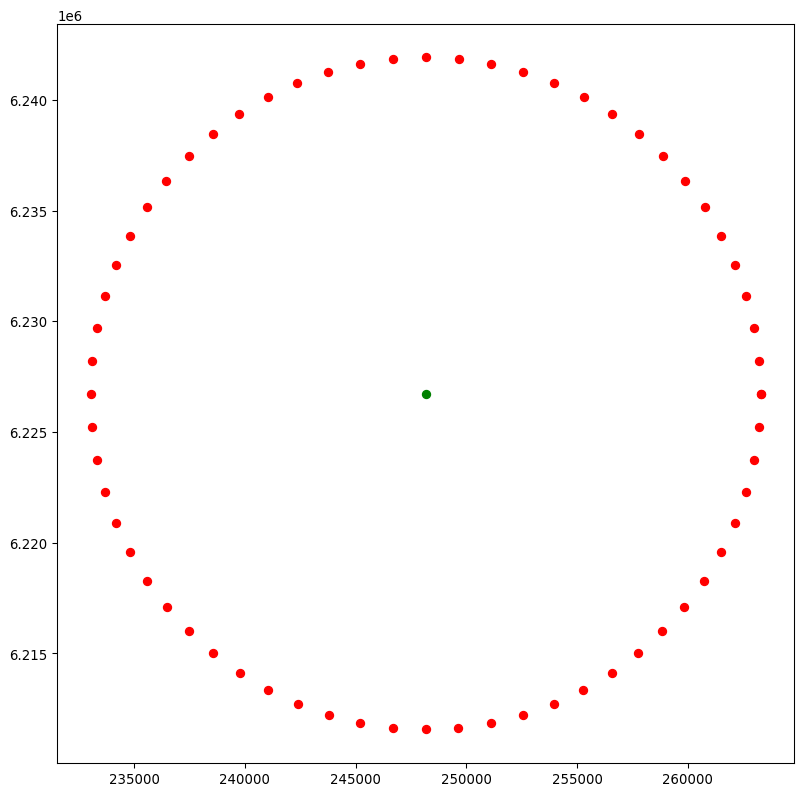

# 5. Exercices supplémentaires

## 5.1 Découvrir l’API d’`OpenFoodFacts`

Pour vous aidez, vous pouvez regarder une exemple de structure du JSON ici :
<https://world.openfoodfacts.org/api/v0/product/3274080005003.json> en particulier la catégorie `nutriments`.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 3 : Retrouver des produits dans l’openfood facts 🍕</h3>

Voici une liste de code-barres:
`3274080005003,  5449000000996, 8002270014901, 3228857000906, 3017620421006, 8712100325953`

Utiliser l’[API d’openfoodfacts](https://world.openfoodfacts.org/data)
(l’API, pas depuis le CSV !)
pour retrouver les produits correspondants
et leurs caractéristiques nutritionnelles.

Le panier paraît-il équilibré ? 🍫

Récupérer l’URL d’une des images et l’afficher dans votre navigateur.

</div>

For example, here is the photo of the product with the barcode `5449000000996`. Do you recognize it?

![](https://images.openfoodfacts.org/images/products/544/900/000/0996/front_en.782.200.jpg)